![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [3]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [4]:
# Celda 1.1
print('Celda 1.1.')
display(bikes.groupby('season').agg({'total': ['describe', 'sum']}))

Celda 1.1.


total                                                          \
       describe                                                           
          count        mean         std  min   25%    50%    75%    max   
season                                                                    
1        2686.0  116.343261  125.273974  1.0  24.0   78.0  164.0  801.0   
2        2733.0  215.251372  192.007843  1.0  49.0  172.0  321.0  873.0   
3        2733.0  234.417124  197.151001  1.0  68.0  195.0  347.0  977.0   
4        2734.0  198.988296  177.622409  1.0  51.0  161.0  294.0  948.0   

                
           sum  
         total  
season          
1       312498  
2       588282  
3       640662  
4       544034

In [5]:
# Celda 1.2
print('\nCelda 1.2.')
display(bikes.groupby('hour').agg({'total': ['describe', 'sum']}).sort_values(('total', 'describe','mean'), ascending=False))


Celda 1.2.


total                                                              \
     describe                                                               
        count        mean         std   min     25%    50%     75%    max   
hour                                                                        
17      456.0  468.765351  223.775485  15.0  277.00  480.5  608.50  970.0   
18      456.0  430.859649  219.908138  23.0  240.75  422.5  564.00  977.0   
8       455.0  362.769231  231.723065   8.0  133.50  392.0  563.50  839.0   
16      456.0  316.372807  145.664786  11.0  211.75  309.5  421.00  783.0   
19      456.0  315.278509  156.641732  11.0  190.00  312.5  416.00  743.0   
13      456.0  257.787281  149.167185  11.0  154.00  226.5  329.00  729.0   
12      456.0  256.508772  143.881880   3.0  157.00  234.5  332.00  757.0   
15      456.0  254.298246  144.235670   7.0  154.00  232.0  331.00  724.0   
14      456.0  243.442982  147.563199  12.0  144.00  212.0  311.25  730.0   
20      456.0  228.517544  116.411565  11.0  136.75  224.0  302.00  551.0   
9       455.0  221.780220   92.099209  14.0  161.00  217.0  294.50  414.0   
7       455.0  213.116484  159.207044   1.0   63.00  208.0  334.00  596.0   
11      455.0  210.674725  127.444294  10.0  123.00  183.0  265.50  647.0   
10      455.0  175.092308  101.807629  17.0  106.00  149.0  218.50  539.0   
21      456.0  173.370614   87.629319   6.0  103.50  171.5  230.00  584.0   
22      456.0  133.576754   69.844495   9.0   80.00  129.0  175.00  502.0   
23      456.0   89.508772   51.638004   4.0   52.75   80.0  123.00  256.0   
6       455.0   76.259341   54.745333   1.0   24.50   75.0  118.00  213.0   
0       455.0   55.138462   43.620012   2.0   24.00   41.0   74.50  283.0   
1       454.0   33.859031   34.112105   1.0   11.00   19.0   46.00  168.0   
2       448.0   22.899554   26.110267   1.0    5.00   11.0   32.00  119.0   
5       452.0   19.767699   12.784293   1.0    8.00   19.0   29.00   57.0   
3       433.0   11.757506   12.666442   1.0    3.00    6.0   15.00   66.0   
4       442.0    6.407240    4.217633   1.0    3.00    6.0    9.00   28.0   

              
         sum  
       total  
hour          
17    213757  
18    196472  
8     165060  
16    144266  
19    143767  
13    117551  
12    116968  
15    115960  
14    111010  
20    104204  
9     100910  
7      96968  
11     95857  
10     79667  
21     79057  
22     60911  
23     40816  
6      34698  
0      25088  
1      15372  
2      10259  
5       8935  
3       5091  
4       2832

#### Solución
------------------------------
La base de datos compartida tiene 10886 registros y 12 variables que conforman el set de caracteristicas asociadas al prestamo de bicicletas que realizan los usuarios casuales o registrados en un espacio de tiempo determinado.

Tomando como referencia la temporada del año en que se realiza el alquiler y la hora, se encuentran los siguientes resultados:
1. El `verano` con 640662 alquileres (ocasionales y registrados) y la `primavera` (588282) son las temporadas del año con la mayor cantidad de bicicletas alquiladas.
2. En promedio, en una hora y dia determinado se realizan en `verano` 234 prestamos de bicicletas, sin embargo, la cantidad de bicicletas prestadas presenta alta dispersión, ya que en algunas horas y días determinados se pueden alquilar entre 1 (horas con menor tráfico de alquileres) y 977 (horas con mayor volumen de alquileres). Además, es importante señalar que la cantidad de bicicletas alquiladas en promedio duplica la cantidad de alquileres en `invierno` (116). El hecho de que la cantidad de prestamos de bicicletas disminuya en invierno se podría explicar por las condiciones climaticas (lluvia) que afrontan los usuarios que hace que prefieran otros medios de transporte para su desplazamiento.

3. La horas con mayor cantidad de alquileres son entre las 5 p.m. y 6 p.m., cuando los usuarios utilizan este medio de transporte para movilizarse luego de culminada la jornada laboral.
4. Entre las 9 p.m. y las 6 a.m. son las horas con menor cantidad de bicicletas prestadas, siendo las 3 y 4 a.m. las horas con menor promedio de alquileres, 11 y 6 respectivamente.

En conclusión, la información permite encontrar evidencia inicial para afirmar que los usuarios acceden a alquilar las bicicletas para movilizarse posiblemente desde y hacía los centros de trabajo, asociado a las horas en las que posiblemente ingresan o salen del trabajo, o durante sus descansos, sobre el medio día. Además, toman en cuentas las condiciones climaticas que se pueden presentar en las diferentes temporadas del año para elegir su medio de transporte, ya que en promedio eligen con menos frecuencia alquilar una bicicleta si estamos en inviero, donde la lluvia se convierte en un factor importante en algunos lugares y establece limitaciones a los usuarios que los induce a sustituir este medio de transporte por otros.


### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

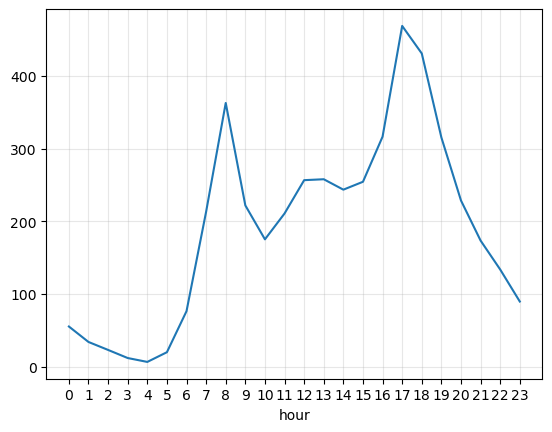

In [6]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()
plt.xticks(range(0, 24, 1))
plt.grid(alpha=0.3)
plt.show()

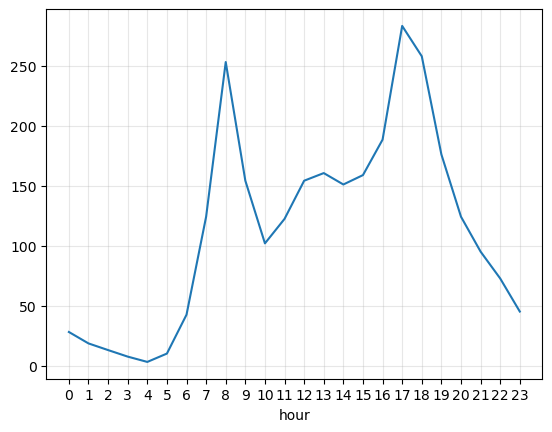

In [7]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos 
bikes[bikes['season']==1].groupby('hour').total.mean().plot()
plt.xticks(range(0, 24, 1))
plt.grid(alpha=0.3)
plt.show()

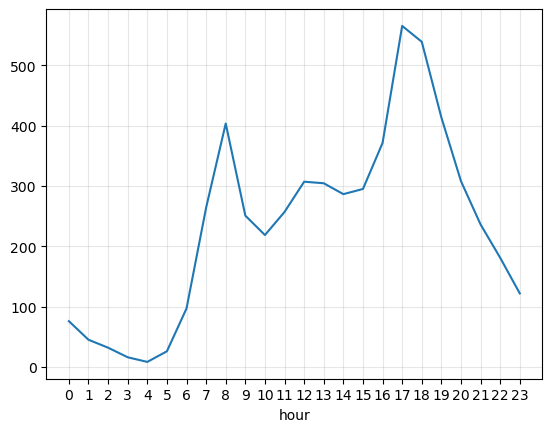

In [8]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos 
bikes[bikes['season']==3].groupby('hour').total.mean().plot()
plt.xticks(range(0, 24, 1))
plt.grid(alpha=0.3)
plt.show()

#### Solución
------------------------------

1. Los resultados son consistentes con lo evidenciado en el análisis descriptivo, y adicionalmente, contribuyen a profundizar en el análisis en la media que se puede observar que hay una tendencia definida en terminos generales y de acuerdo a las dos temporadas de año observadas (invierno y verano).
2. Lo primero que se identifica si comparamos las temporadas del año es que la cantidad de alquileres promedios en cada hora se duplica en el verano, con respecto al invierno, o en otras palabras, en invierno los prestamos de bicicletas se reducen a la mitad, en promedio.
3. Las horas con mayor cantidad de bicicletas alquiladas son las 8 a.m. y las 5 p.m., mientras que desde las 5 p.m. la cantidad de bicicletas que se alquilan en promedio desciende, hasta las 4 a.m. del siguiente día.
4. Entre las 0 horas y las 4 a.m. se alquilan en promedio menos de 100 bicicletas.
5. Los cambios más importantes en la cantidad promedio de bicicletas alquiladas se dan entre las 6 y 8 a.m. y entre las 4 y 5 p.m..

En conclusión, a medida que avanza la noche, disminuye la cantidad promedio de bicicletas alquiladas, lo que puede estar asociado a que en algunos lugares las dinamicas sociales y laborales disminuyen o a problemas de seguridad que hacen que un usuario no se sienta a gusto de conducir en las noches (eso depende de donde provienen los datos). También, a medio día se observa un incremento leve en la cantidad promedio de alquileres, y en la mañana y en la tarde, alrededor de las 8 a.m. y de las 5 p.m. la cantidad promedio de usuarios que solicitan el servicio de alquiler es mayor, predominando la cantidad de usuarios que hacen uso del servicio en la tarde.

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [9]:
# Celda 3
# from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Crear las dummies
season_dummies = pd.get_dummies(bikes['season'], prefix='season', drop_first=True)
## Concatenar los dummies al dataframe original
bikes_rl = pd.concat([bikes, season_dummies], axis=1)
# Eliminar la columna original 'season'
bikes_rl.drop('season', axis=1, inplace=True)

X = bikes_rl[['season_2','season_3','season_4', 'hour']]
y = bikes_rl['total']

model = LinearRegression().fit(X, y)
print('Coeficientes:', model.coef_)
print('Intercepto:', model.intercept_)

y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
print('MSE:', mse)


Coeficientes: [100.31723192 119.46754995  84.08311787  10.54520609]
Intercepto: -6.430262462305734
MSE: 25480.694694371625


#### Solución
------------------------------
Interpretación de coeficientes:
1. Si todo lo demás permanece constante -ceteris paribus, en promedio se alquilan 100.31 bicicletas más en primavera que en invierno, de igual forma, en promedio se alquilan 119 bicicletas más en verano que en invierno, y en 84 bicicletas más en otoño que en invierno.
2. La cantidad de bicicletas alquiladas aumentan en promedio en un factor de 10.54 por cada hora adicional y no se alquilan bicicletas en la hora cero.
3. El intercepto igual a -6.43 muestra el punto de corte y no tiene sentido su interpretación por si solo, sino que implica una corrección a la cantidad de bicicletas alquiladas sujetas a la hora y temporada.
4. La relación entre la cantidad de bicicletas alquiladas y las variables predictoras es positiva.

Limitaciones de la regresión lineal:
1. La hora no tiene una relación lineal con la cantidad de bicicletas que se alquilan, sino que tiene unos picos y valles que la regresión lineal no detecta. El modelo es incorrecto en la medida que predice erroneamente que a altas horas de la noche, ejemplo las 11 p.m. (23 horas) es cuando mayor cantidad de bicicletas se alquilan.
2. Este modelo de regresión no tiene en cuenta las relaciones no lineales que pueden existir entre las variables predictoras hora y temporada.
3. Tal como se definió el modelo de regresión lineal, no permite la identificación de puntos de corte en las horas de prestamos de bicicletas, que si es posible determinar en un modelo de arboles.

En conclusión, pueden existir otros modelos que recojan mejor la complejidad de la información del mercado de arrendamientos de bicicletas.

Además, el MSE del modelo es de 25480.

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [10]:
def fit_decision_tree(X, y, max_depth=np.inf, min_samples_leaf=1):
    
    def mse(y):
        return np.mean((y - np.mean(y)) ** 2)

    def find_best_split(X, y):

        best_mse = np.inf
        features = range(X.shape[1])
        best_split = [0, 0, best_mse]  # j, split, mse

        for j in features:
            feature_values = X.iloc[:, j]
            splits = np.unique(feature_values)[1:]

            for split in splits:
                filter_l = X.iloc[:, j] < split
                y_left = y.loc[filter_l]
                y_right = y.loc[~filter_l]

                mse_left = mse(y_left)
                mse_right = mse(y_right)
                mse_total = (len(y_left)/len(y))*mse_left + (len(y_right)/len(y))*mse_right

                if mse_total < best_split[2]:
                    best_split = [j,split,mse_total]
        return best_split

    def build_tree(X, y, depth=0):

        j, split, mse = find_best_split(X, y)
        # Stopping criteria
        if depth == max_depth or len(X) < min_samples_leaf:
            return {"split_point": -1,
                    "mse": mse,
                    "n_samples": len(y),
                    'prediccion': np.mean(y)
                   }

        filter_l = X.iloc[:, j] < split
        X_left, y_left = X.loc[filter_l], y.loc[filter_l]
        X_right, y_right = X.loc[~filter_l], y.loc[~filter_l]

        tree = {"split_var": j, 
                "split_point": split,
                "mse": mse,
                "n_samples": X.shape[0],
                "left": build_tree(X_left, y_left, depth+1),
                "right": build_tree(X_right, y_right, depth+1)
               }
        return tree
    
    # Build tree recursively
    decision_tree = build_tree(X, y)
    return decision_tree

In [11]:
# Celda 4
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split

X = bikes[['season','hour']]
y = bikes['total']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

tree = fit_decision_tree(X_train, y_train, max_depth=10, min_samples_leaf=6)
tree

{'split_var': 1,
 'split_point': 7,
 'mse': 22211.669840948547,
 'n_samples': 8164,
 'left': {'split_var': 1,
  'split_point': 6,
  'mse': 1254.325596621765,
  'n_samples': 2385,
  'left': {'split_var': 1,
   'split_point': 2,
   'mse': 769.6434255288101,
   'n_samples': 2043,
   'left': {'split_var': 0,
    'split_point': 2,
    'mse': 1559.7431512388523,
    'n_samples': 681,
    'left': {'split_var': 1,
     'split_point': 1,
     'mse': 511.301861289203,
     'n_samples': 158,
     'left': {'split_var': 0,
      'split_point': 0,
      'mse': inf,
      'n_samples': 77,
      'left': {'split_point': -1,
       'mse': inf,
       'n_samples': 0,
       'prediccion': nan},
      'right': {'split_var': 0,
       'split_point': 0,
       'mse': inf,
       'n_samples': 77,
       'left': {'split_point': -1,
        'mse': inf,
        'n_samples': 0,
        'prediccion': nan},
       'right': {'split_var': 0,
        'split_point': 0,
        'mse': inf,
        'n_samples': 77,
     

In [12]:
# Definición de la función tree_predict para hacer predicciones según las variables 'X' y el árbol 'tree'
def tree_predict(X, tree):
    
    predicted = np.ones(X.shape[0])

    # Revisar si es el nodo final
    if tree['split_point'] == -1:
        predicted = predicted * tree['prediccion']
        
    else:
        
        j = tree['split_var']
        split = tree['split_point']
        filter_l = (X.iloc[:, j] < split)
        X_l = X.loc[filter_l]
        X_r = X.loc[~filter_l]

        if X_l.shape[0] == 0:  # Si el nodo izquierdo está vacio solo continua con el derecho 
            predicted[~filter_l] = tree_predict(X_r, tree['right'])
        elif X_r.shape[0] == 0:  #  Si el nodo derecho está vacio solo continua con el izquierdo
            predicted[filter_l] = tree_predict(X_l, tree['left'])
        else:
            predicted[filter_l] = tree_predict(X_l, tree['left'])
            predicted[~filter_l] = tree_predict(X_r, tree['right'])

    return predicted

In [13]:
y_pred = tree_predict(X_test, tree)
y_pred

array([250.07142857,   3.15      , 472.39506173, ...,  21.36046512,
        28.83116883,  13.23809524])

In [14]:
def calculate_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [15]:
calculate_mse(y_test, y_pred)

13225.119157558604

#### Solución
------------------------------
Se realizó la estimación de un árbol de decisión manual con una profundidad de 10 y el criterio de parada de 6 muestras en la hoja.
Como resultado se encuentra que el MSE del modelo es de 13225, casi la mitad del error que presentó el modelo de regresión (25480).

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

El mse más bajo es 12964.664786393827 y se alcanza a una profundidad de 9


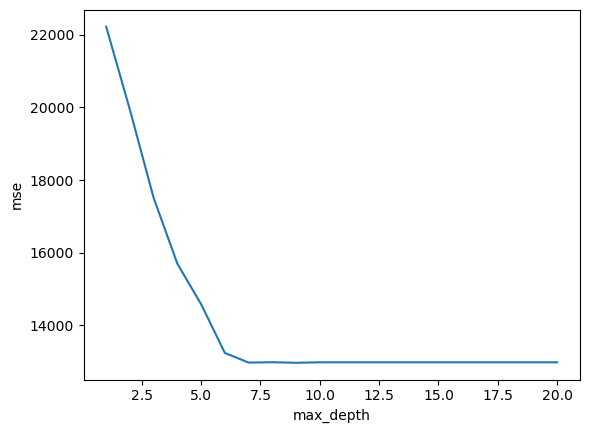

In [16]:
# Celda 5
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split

X = bikes[['season','hour']]
y = bikes['total']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 21)

# Lista para guardar los valores del RMSE para cada valor de máxima profundidad (max_depth)
mse_neg = []

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeRegressor de la libreria sklearn
    clf = DecisionTreeRegressor(max_depth=depth, random_state=1)
    mse_neg.append(cross_val_score(clf, X_train, y_train, cv=100, scoring='neg_mean_squared_error').mean())

# Gráfica max_depth versus RMSE (error del modelo)
mse = [-x for x in mse_neg]
plt.plot(max_depth_range, mse)
plt.xlabel('max_depth')
plt.ylabel('mse')
print(f'El mse más bajo es {min(mse)} y se alcanza a una profundidad de {mse.index(min(mse))+1}')

#### Solución
------------------------------
Ahora se estima el modelo de arboles de decisión utilizando la librería de sklearn. Se calibra la profundidad del árbol y se detiene en 20 porque hasta ese punto ya el promedio de las 100 muestras CV alcanza un valor limite. El mse más bajo se alcanza a una profundidad de 9 y es igual a 12964.

En comparación con los resultados obtenidos en el punto 3 y 4, el modelo final que acabo de describir tiene un mse más bajo, por lo que minimiza el error de predicción comparado con el mse de 25480 del modelo de regresión lineal y con los 13225 de los árboles que se realizaron manualmente. Esta variación también se puede deber a la estrategia de validación cruzada y a la suavización del árbol a través de la media de esas muestras.

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [17]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [18]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [19]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [20]:
# Celda 6
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV, train_test_split

# Árbol de decisión
dtc = DecisionTreeClassifier()
parametros = {'max_depth': [2, 3, 4, 5, 6, 7], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7]}
clf_dtc = GridSearchCV(dtc, parametros, cv=5)
clf_dtc.fit(X_train, y_train)

# Regresión logística
lr = LogisticRegression()
parameters = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}
clf_lr = GridSearchCV(lr, parameters, cv=5)
clf_lr.fit(X_train, y_train)

# Evaluación de los modelos en train para validar overfitting
y_train_pred_dtc = clf_dtc.predict(X_train)
y_train_pred_lr = clf_lr.predict(X_train)

accuracy_train_dtc = accuracy_score(y_train, y_train_pred_dtc)
f1_train_dtc = f1_score(y_train, y_train_pred_dtc)

accuracy_train_lr = accuracy_score(y_train, y_train_pred_lr)
f1_train_lr = f1_score(y_train, y_train_pred_lr)

# Evaluación de los modelos
y_pred_dtc = clf_dtc.predict(X_test)
y_pred_lr = clf_lr.predict(X_test)

accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
f1_dtc = f1_score(y_test, y_pred_dtc)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print("Árbol de decisión:")
print("Mejores parámetros:", clf_dtc.best_params_)
print("Accuracy train:", accuracy_train_dtc)
print("Accuracy test:", accuracy_dtc)
print("F1-Score train:", f1_train_dtc)
print("F1-Score test:", f1_dtc)

print("Regresión logística:")
print("Mejores parámetros:", clf_lr.best_params_)
print("Accuracy train:", accuracy_train_lr)
print("Accuracy test:", accuracy_lr)
print("F1-Score train:", f1_train_lr)
print("F1-Score test:", f1_lr)


Árbol de decisión:
Mejores parámetros: {'max_depth': 2, 'min_samples_leaf': 1}
Accuracy train: 0.6326666666666667
Accuracy test: 0.6453333333333333
F1-Score train: 0.628956228956229
F1-Score test: 0.6448598130841121
Regresión logística:
Mejores parámetros: {'C': 1, 'penalty': 'l2'}
Accuracy train: 0.6128888888888889
Accuracy test: 0.614
F1-Score train: 0.6053466243769822
F1-Score test: 0.6106254203093476


#### Solución
------------------------------
Para la calibración de los modelos se utilizó GridSearchCV para seleccionar los mejores parametros de una lista de hiperparametros, que en el caso de modelo arboles es la profundidad y un criterio de parada según el número minimo que puede tomar una hoja, además se ajustan los parametros con cross validation. Y para el modelo de regresión logistica, se ajustaron dos parametros: regularización para controlar por la complejidad del modelo (mayor C es mayor varianza), y la regularización por norma 1 y norma 2.

1. Para el arbol de clasificación: la profundidad del arbol es 2 y la cantidad minima de observaciones en la hoja es 1. La precisión del modelo es de 0.64 en la muestra de Test. Debido a que la precisión es similar en Test y Train no se encuentra overfitting. El f1-score también es de 0.64

2. Para la regresión logistica: el parametro de regularización C es igual a 1 lo que implica baja complejida del modelo y poca varianza, así como la regularización de norma 2 que impone restricciones a modelos complejos, penalizando los coeficientes altos en el modelo. En este caso la precisión en la muestra de Test es de 0.61 y el f1-score de 0.61. Tampoco se encuentra evidencia de overfitting.

En conclusión, el mejor modelo de estos dos es el arbol de clasificación porque tiene mayor precisión y un f1-score mas alto.

### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth tome un valor de su elección\
-100 árboles de decisión donde min_samples_leaf tome un valor de su elección\
-100 regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

In [21]:
# Celda 7
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, f1_score

#tres clasificadores diferentes, cada uno con sus hiperparámetros
dt1 = DecisionTreeClassifier(max_depth=3)
dt2 = DecisionTreeClassifier(min_samples_leaf=5)
lr = LogisticRegression()

# Crear tres BaggingClassifiers, uno para cada clasificador
bagging_dt1 = BaggingClassifier(base_estimator=dt1, n_estimators=100, random_state=42)
bagging_dt2 = BaggingClassifier(base_estimator=dt2, n_estimators=100, random_state=41)
bagging_lr = BaggingClassifier(base_estimator=lr, n_estimators=100, random_state=40)

# Entrenar cada uno de los BaggingClassifiers con los datos de entrenamiento
bagging_dt1.fit(X_train, y_train)
bagging_dt2.fit(X_train, y_train)
bagging_lr.fit(X_train, y_train)

### Evaluar: accuracy_score y f1_score
# Evaluar el árbol de decisión 1
y_train_dt1 = bagging_dt1.predict(X_train)
acc_train_dt1 = accuracy_score(y_train, y_train_dt1)
f1_train_dt1 = f1_score(y_train, y_train_dt1)

y_pred_dt1 = bagging_dt1.predict(X_test)
acc_dt1 = accuracy_score(y_test, y_pred_dt1)
f1_dt1 = f1_score(y_test, y_pred_dt1)

# Evaluar el árbol de decisión 2
y_train_dt2 = bagging_dt2.predict(X_train)
acc_train_dt2 = accuracy_score(y_train, y_train_dt2)
f1_train_dt2 = f1_score(y_train, y_train_dt2)

y_pred_dt2 = bagging_dt2.predict(X_test)
acc_dt2 = accuracy_score(y_test, y_pred_dt2)
f1_dt2 = f1_score(y_test, y_pred_dt2)

# Evaluar la regresión logística
y_train_lr = bagging_lr.predict(X_train)
acc_train_lr = accuracy_score(y_train, y_train_lr)
f1_train_lr = f1_score(y_train, y_train_lr)

y_pred_lr = bagging_lr.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print("Arbol de clasificación 1 - Test: Accuracy = {:.4f}, F1-score = {:.4f}".format(acc_dt1, f1_dt1))
print("Arbol de clasificación 1 - Train: Accuracy = {:.4f}, F1-score = {:.4f}".format(acc_train_dt1, f1_train_dt1))

print("Arbol de clasificación 2 - Test: Accuracy = {:.4f}, F1-score = {:.4f}".format(acc_dt2, f1_dt2))
print("Arbol de clasificación 2 - Train: Accuracy = {:.4f}, F1-score = {:.4f}".format(acc_train_dt2, f1_train_dt2))

print("Regresión logística - Test: Accuracy = {:.4f}, F1-score = {:.4f}".format(acc_lr, f1_lr))
print("Regresión logística - Train: Accuracy = {:.4f}, F1-score = {:.4f}".format(acc_train_lr, f1_train_lr))

# Combinar las predicciones de los tres clasificadores
y_pred_ensemble = (y_pred_dt1 + y_pred_dt2 + y_pred_lr) >= 2
acc_ensemble = accuracy_score(y_test, y_pred_ensemble)
f1_ensemble = f1_score(y_test, y_pred_ensemble)

print("Rendimiento del ensamble con votación mayoritaria: Accuracy = {:.4f}, F1-score = {:.4f}".format(acc_ensemble, f1_ensemble))


Arbol de clasificación 1 - Test: Accuracy = 0.6447, F1-score = 0.6377
Arbol de clasificación 1 - Train: Accuracy = 0.6440, F1-score = 0.6354
Arbol de clasificación 2 - Test: Accuracy = 0.6600, F1-score = 0.6614
Arbol de clasificación 2 - Train: Accuracy = 0.9807, F1-score = 0.9805
Regresión logística - Test: Accuracy = 0.6207, F1-score = 0.6158
Regresión logística - Train: Accuracy = 0.6191, F1-score = 0.6096
Rendimiento del ensamble con votación mayoritaria: Accuracy = 0.6460, F1-score = 0.6410


#### Solución
------------------------------

Se estimaron 100 árboles de decisión con max_depth == 3, 100 árboles de decisión con min_samples_leaf==5, y 100 regresiones logísticas.

Se entrenaron los modelos con los datos de Train y se evaluar en los datos de Test. Los resultados muestran que el modelo de arboles con minimo de observaciones en la hoja igual a 5 tienen overfitting en la base de entrenamiento, para solucionar esto se puede realizar CV, establecer la profundidad del arbol, pero estos parametros no se modifican bajo el entendido de que eso es lo que debemos identificar en este ejercicio.

Los arboles de clasificación que si establecen una profundidad del árbol y el modelo de regresión logistica no tienen problemas de overfitting. Sin embargo, la precisión en los datos de entrenamiento es mejor en el modelo con overfitting.

Por último, después de realizar el ensemble, la precisión no mejora en comparación con el árbol de clasificación con profundidad definida y es menor al modelo con overfitting, y el f1-score si mejora en comparación con el primer modelo y el tercero, pero nuevamente, el modelo 2 con overfitting tiene mejor F1.

### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [22]:
# Celda 8
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, f1_score

#tres clasificadores diferentes, cada uno con sus hiperparámetros
dt1 = DecisionTreeClassifier(max_depth=3)
dt2 = DecisionTreeClassifier(min_samples_leaf=5)
lr = LogisticRegression()

# Crear tres BaggingClassifiers, uno para cada clasificador
bagging_dt1 = BaggingClassifier(base_estimator=dt1, n_estimators=100, random_state=42, oob_score=True)
bagging_dt2 = BaggingClassifier(base_estimator=dt2, n_estimators=100, random_state=41, oob_score=True)
bagging_lr = BaggingClassifier(base_estimator=lr, n_estimators=100, random_state=40, oob_score=True)

# Entrenar cada uno de los BaggingClassifiers con los datos de entrenamiento
bagging_dt1.fit(X_train, y_train)
bagging_dt2.fit(X_train, y_train)
bagging_lr.fit(X_train, y_train)

### Evaluar: accuracy_score y f1_score
# Evaluar el árbol de decisión 1
y_train_dt1 = bagging_dt1.predict(X_train)
acc_train_dt1 = accuracy_score(y_train, y_train_dt1)
f1_train_dt1 = f1_score(y_train, y_train_dt1)

y_pred_dt1 = bagging_dt1.predict(X_test)
acc_dt1 = accuracy_score(y_test, y_pred_dt1)
f1_dt1 = f1_score(y_test, y_pred_dt1)

# Evaluar el árbol de decisión 2
y_train_dt2 = bagging_dt2.predict(X_train)
acc_train_dt2 = accuracy_score(y_train, y_train_dt2)
f1_train_dt2 = f1_score(y_train, y_train_dt2)

y_pred_dt2 = bagging_dt2.predict(X_test)
acc_dt2 = accuracy_score(y_test, y_pred_dt2)
f1_dt2 = f1_score(y_test, y_pred_dt2)

# Evaluar la regresión logística
y_train_lr = bagging_lr.predict(X_train)
acc_train_lr = accuracy_score(y_train, y_train_lr)
f1_train_lr = f1_score(y_train, y_train_lr)

y_pred_lr = bagging_lr.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print("Arbol de clasificación 1 - Test: Accuracy = {:.4f}, F1-score = {:.4f}".format(acc_dt1, f1_dt1))
print("Arbol de clasificación 1 - Train: Accuracy = {:.4f}, F1-score = {:.4f}".format(acc_train_dt1, f1_train_dt1))

print("Arbol de clasificación 2 - Test: Accuracy = {:.4f}, F1-score = {:.4f}".format(acc_dt2, f1_dt2))
print("Arbol de clasificación 2 - Train: Accuracy = {:.4f}, F1-score = {:.4f}".format(acc_train_dt2, f1_train_dt2))

print("Regresión logística - Test: Accuracy = {:.4f}, F1-score = {:.4f}".format(acc_lr, f1_lr))
print("Regresión logística - Train: Accuracy = {:.4f}, F1-score = {:.4f}".format(acc_train_lr, f1_train_lr))

Arbol de clasificación 1 - Test: Accuracy = 0.6447, F1-score = 0.6377
Arbol de clasificación 1 - Train: Accuracy = 0.6440, F1-score = 0.6354
Arbol de clasificación 2 - Test: Accuracy = 0.6600, F1-score = 0.6614
Arbol de clasificación 2 - Train: Accuracy = 0.9807, F1-score = 0.9805
Regresión logística - Test: Accuracy = 0.6207, F1-score = 0.6158
Regresión logística - Train: Accuracy = 0.6191, F1-score = 0.6096


In [23]:
def weighted_voting(clfs, X_train, y_train, X_test, y_test):
    """
    Realiza un ensamble por votación ponderada de una lista de clasificadores.
    Devuelve el accuracy y el F1-score del ensamble en los datos de test.
    """
    n_clfs = len(clfs)
    errors = np.zeros(n_clfs)
    y_pred_all_ = np.zeros((X_test.shape[0], n_clfs))

    for i, clf in enumerate(clfs):
        oob_sample = ~clf.estimators_samples_[i]
        y_pred_ = clf.estimators_[i].predict(X_train.values[oob_sample])
        errors[i] = accuracy_score(y_pred_, y_train.values[oob_sample])
        y_pred_all_[:, i] = clf.estimators_[i].predict(X_test)
        
    alpha = (1 - errors) / (1 - errors).sum()
    y_pred = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)
    
    acc_ensemble = accuracy_score(y_test, y_pred)
    f1_ensemble = f1_score(y_test, y_pred)
    
    return acc_ensemble, f1_ensemble

In [24]:
# Ensamble por votación ponderada
clfs = [bagging_dt1, bagging_dt2, bagging_lr]
acc_ensemble_w, f1_ensemble_w = weighted_voting(clfs, X_train, y_train, X_test, y_test)
print("Rendimiento del ensamble por votación ponderada: Accuracy = \
{:.4f}, F1-score = {:.4f}".format(acc_ensemble_w, f1_ensemble_w))


Rendimiento del ensamble por votación ponderada: Accuracy = 0.6200, F1-score = 0.6053


### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

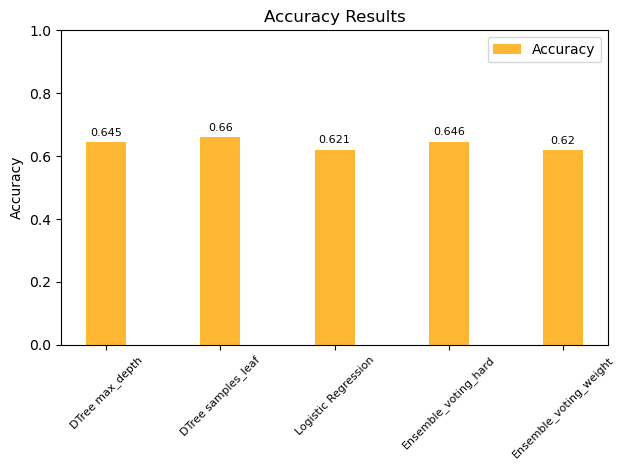

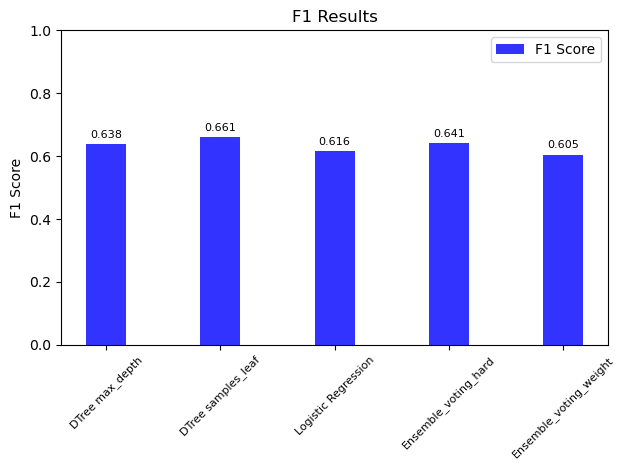

In [25]:
# Celda 9
import matplotlib.pyplot as plt
# Etiquetas para los modelos
models = ['DTree max_depth', 'DTree samples_leaf', 'Logistic Regression', 'Ensemble_voting_hard', 'Ensemble_voting_weight']

acc_results = [acc_dt1, acc_dt2, acc_lr, acc_ensemble, acc_ensemble_w]
f1_results = [f1_dt1, f1_dt2, f1_lr, f1_ensemble, f1_ensemble_w]

# Gráfico de barras para accuracy
bar_width = 0.35
opacity = 0.8
plt.bar(np.arange(len(models)), acc_results, bar_width, alpha=opacity, color='orange', label='Accuracy')
plt.xticks(np.arange(len(models)), models, rotation=45)
plt.ylim([0,1])
plt.title('Accuracy Results')
plt.ylabel('Accuracy')
plt.xticks(fontsize=8)
for i, acc in enumerate(acc_results):
    plt.text(i, acc + 0.02, str(round(acc, 3)), ha='center', fontsize=8)
plt.legend()
plt.tight_layout()
plt.show()

# Gráfico de barras para f1
plt.bar(np.arange(len(models)), f1_results, bar_width, alpha=opacity, color='b', label='F1 Score')
plt.xticks(np.arange(len(models)), models, rotation=45)
plt.ylim([0,1])
plt.title('F1 Results')
plt.ylabel('F1 Score')
plt.xticks(fontsize=8)
for i, f1 in enumerate(f1_results):
    plt.text(i, f1 + 0.02, str(round(f1, 3)), ha='center', fontsize=8)
plt.legend()
plt.tight_layout()
plt.show()


#### Solución
------------------------------

Después de hacer el ensemble con votación mayoritaria y por medio de ponderaciones, se encuentra que para este conjunto de datos el accuracy y el f1 score es mayor para votación mayoritaria que por votación ponderada. La ventaja de realizar ponderaciones es que es posible establecer la importancia de cada modelo, de acuerdo a los errores ya que asigna un mayor peso si el error de clasificación es menor y eso es un punto favorable en la medida que penaliza aquellas predicciones con bajo poder de precisión. Sin embargo, para este conjunto de datos la votación mayoritaria resulta pertinente.